In [1]:
import polars as pl

In [2]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [3]:
df_outages = pl.read_csv("datasets/eaglei_outages_2016.csv")

In [4]:
df_weather = pl.read_csv("datasets/WeatherEvents_Jan2016-Dec2022.csv")

In [5]:
df_outages.shape, df_weather.shape

((13306024, 5), (8627181, 14))

In [6]:
df_weather.sample(3)

EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
str,str,str,str,str,f64,str,str,f64,f64,str,str,str,i64
"""W-8582173""","""Cold""","""Severe""","""2018-06-21 15:55:00""","""2018-06-21 16:15:00""",0.0,"""US/Central""","""KSOA""",30.5857,-100.6486,"""Sonora""","""Sutton""","""TX""",76950
"""W-5626124""","""Rain""","""Light""","""2019-06-05 03:15:00""","""2019-06-05 04:15:00""",0.0,"""US/Central""","""KMOX""",45.5677,-95.9659,"""Morris""","""Stevens""","""MN""",56267
"""W-1965035""","""Rain""","""Light""","""2017-05-29 00:14:00""","""2017-05-29 00:34:00""",0.0,"""US/Central""","""KBBB""",45.331,-95.6469,"""Benson""","""Swift""","""MN""",56215


In [7]:
df_outages.sample(3)

fips_code,county,state,customers_out,run_start_time
i64,str,str,i64,str
55125,"""Vilas""","""Wisconsin""",22,"""2016-11-04 14:30:00"""
34025,"""Monmouth""","""New Jersey""",8,"""2016-11-25 10:00:00"""
29027,"""Callaway""","""Missouri""",1,"""2016-04-03 12:45:00"""


## Data Cleaning:

In [8]:
print(df_outages.null_count())
print(df_weather.null_count())

shape: (1, 5)
┌───────────┬────────┬───────┬───────────────┬────────────────┐
│ fips_code ┆ county ┆ state ┆ customers_out ┆ run_start_time │
│ ---       ┆ ---    ┆ ---   ┆ ---           ┆ ---            │
│ u32       ┆ u32    ┆ u32   ┆ u32           ┆ u32            │
╞═══════════╪════════╪═══════╪═══════════════╪════════════════╡
│ 0         ┆ 0      ┆ 0     ┆ 0             ┆ 0              │
└───────────┴────────┴───────┴───────────────┴────────────────┘
shape: (1, 14)
┌─────────┬──────┬──────────┬────────────────┬───┬───────┬────────┬───────┬─────────┐
│ EventId ┆ Type ┆ Severity ┆ StartTime(UTC) ┆ … ┆ City  ┆ County ┆ State ┆ ZipCode │
│ ---     ┆ ---  ┆ ---      ┆ ---            ┆   ┆ ---   ┆ ---    ┆ ---   ┆ ---     │
│ u32     ┆ u32  ┆ u32      ┆ u32            ┆   ┆ u32   ┆ u32    ┆ u32   ┆ u32     │
╞═════════╪══════╪══════════╪════════════════╪═══╪═══════╪════════╪═══════╪═════════╡
│ 0       ┆ 0    ┆ 0        ┆ 0              ┆ … ┆ 16912 ┆ 0      ┆ 0     ┆ 69199   │
└──────

In [9]:
df_outages = df_outages.with_columns(pl.col("run_start_time").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S"))
df_weather = df_weather.with_columns([
    pl.col("StartTime(UTC)").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S"),
    pl.col("EndTime(UTC)").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S")
])

In [10]:
df_outages.sample(5)
df_weather.sample(5)

EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
str,str,str,datetime[μs],datetime[μs],f64,str,str,f64,f64,str,str,str,i64
"""W-6594541""","""Rain""","""Light""",2019-10-22 07:01:00,2019-10-22 07:11:00,0.04,"""US/Central""","""KEET""",33.1783,-86.7817,"""Alabaster""","""Shelby""","""AL""",35007
"""W-7438469""","""Fog""","""Severe""",2016-08-18 07:44:00,2016-08-18 08:25:00,0.0,"""US/Eastern""","""KBJJ""",40.8731,-81.8867,"""Smithville""","""Wayne""","""OH""",44677
"""W-1283901""","""Rain""","""Light""",2020-01-28 14:15:00,2020-01-28 16:55:00,0.39,"""US/Central""","""KDUC""",34.4778,-97.9616,"""Duncan""","""Stephens""","""OK""",73533
"""W-425463""","""Rain""","""Heavy""",2018-12-27 23:55:00,2018-12-28 00:15:00,0.31,"""US/Central""","""KALX""",32.9147,-85.9628,"""Alexander City""","""Tallapoosa""","""AL""",35010
"""W-1813216""","""Rain""","""Light""",2018-12-21 04:35:00,2018-12-21 05:35:00,0.06,"""US/Eastern""","""KLKU""",38.0097,-77.97,"""Louisa""","""Louisa""","""VA""",23093


In [11]:
df_weather = df_weather.with_columns(pl.col("Type").cast(pl.Categorical))

C:\Users\Sarah-Lee Tanaka\AppData\Local\Temp\ipykernel_21976\2572444476.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  df_weather = df_weather.with_columns(pl.col("Type").cast(pl.Categorical))


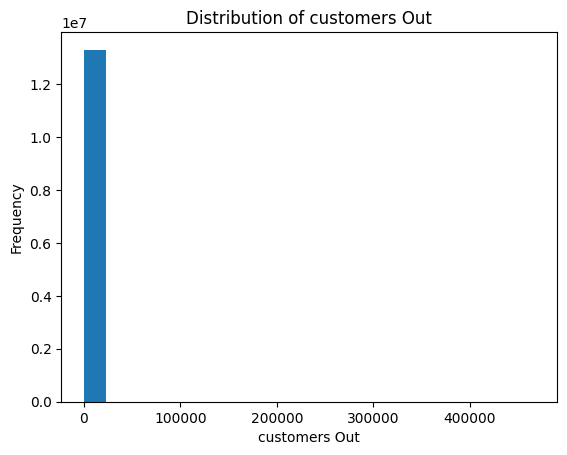

In [12]:
#Outlier Detection and Handling:
# Example to plot a histogram for `Customers_Out`
import matplotlib.pyplot as plt
plt.hist(df_outages["customers_out"].to_numpy(), bins=20)
plt.xlabel('customers Out')
plt.ylabel('Frequency')
plt.title('Distribution of customers Out')
plt.show()

In [13]:
# Sort by datetime columns
df_outages = df_outages.sort("run_start_time")
df_weather = df_weather.sort("StartTime(UTC)")

In [14]:
from scipy import stats
import numpy as np

# Calculate z-scores
z_scores = stats.zscore(df_outages["customers_out"].to_numpy())  # Convert to NumPy array

# Define a threshold (e.g., 3 standard deviations)
threshold = 0.02
# Create a boolean mask for outliers using NumPy
outlier_mask = (np.abs(z_scores) >= threshold)

# Filter out outliers using the boolean mask
df_outages_filtered = df_outages.filter(~pl.Series(outlier_mask))


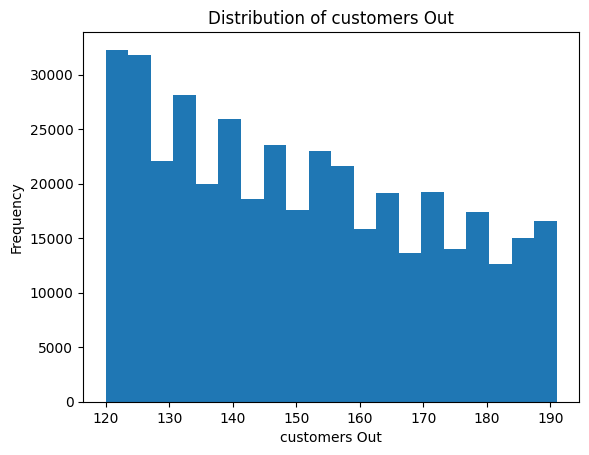

In [15]:
plt.hist(df_outages_filtered["customers_out"].to_numpy(), bins=20)
plt.xlabel('customers Out')
plt.ylabel('Frequency')
plt.title('Distribution of customers Out')
plt.show()

## Feature Engineering:

In [16]:
#One-Hot Encoding for Weather Types
weather_types = ["Rain", "Cold", "Snow", "Fog"]
for weather_type in weather_types:
    df_weather = df_weather.with_columns(
        (pl.col("Type") == weather_type).cast(pl.Int8).alias(weather_type.lower())
    )



In [17]:
#Extract relevant time components from the StartTime(UTC) column:
df_weather = df_weather.with_columns(
    (
        pl.col("StartTime(UTC)").dt.year().alias("year"),
        pl.col("StartTime(UTC)").dt.month().alias("month"),
        pl.col("StartTime(UTC)").dt.day().alias("day"),
        pl.col("StartTime(UTC)").dt.hour().alias("hour"),
        pl.col("StartTime(UTC)").dt.weekday().alias("weekday"),
    )
)


In [18]:
#Calculate the duration of each weather event:
df_weather = df_weather.with_columns(
    (pl.col("EndTime(UTC)") - pl.col("StartTime(UTC)")).dt.total_seconds().alias("duration_seconds")
)


In [19]:
#Assign numerical values to each severity level (e.g., "Light"=1, "Moderate"=2, "Heavy"=3, "Severe"=4).
severity_mapping = {"Light": 1, "Moderate": 2, "Heavy": 3, "Severe": 4}
df_weather = df_weather.with_columns(
    pl.col("Severity").replace(severity_mapping).alias("severity_encoded")
)



In [20]:
#Dropping Unnecessary Columns:
df_weather = df_weather.drop(["Type", "Severity", "EventId"])


In [21]:
df_weather.sample(5)

StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
datetime[μs],datetime[μs],f64,str,str,f64,f64,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
2020-07-21 21:31:00,2020-07-21 21:40:00,0.0,"""US/Mountain""","""KEFC""",44.7342,-103.862,"""Belle Fourche""","""Butte""","""SD""",57717,1,0,0,0,2020,7,21,21,2,540,"""1"""
2019-05-02 22:15:00,2019-05-02 22:35:00,0.0,"""US/Eastern""","""KCVX""",45.3047,-85.2747,"""Charlevoix""","""Charlevoix""","""MI""",49720,1,0,0,0,2019,5,2,22,4,1200,"""1"""
2020-01-17 05:53:00,2020-01-17 06:53:00,0.0,"""US/Eastern""","""K48I""",38.6869,-80.6517,"""Sutton""","""Braxton""","""WV""",26601,0,0,1,0,2020,1,17,5,5,3600,"""1"""
2021-08-27 19:14:00,2021-08-27 19:52:00,0.0,"""US/Mountain""","""KGFA""",47.5047,-111.1873,"""Malmstrom Afb""","""Cascade""","""MT""",59402,1,0,0,0,2021,8,27,19,5,2280,"""1"""
2018-09-26 21:29:00,2018-09-26 22:53:00,0.06,"""US/Central""","""KSGR""",29.6223,-95.6565,"""Sugar Land""","""Fort Bend""","""TX""",77498,1,0,0,0,2018,9,26,21,3,5040,"""1"""


In [22]:
df_weather_original = df_weather.clone()  # Create a copy

# Drop columns from the original
df_weather = df_weather.drop(["StartTime(UTC)", "EndTime(UTC)", "AirportCode", "LocationLat", "LocationLng"])


In [23]:
df_outages.sample(4)

fips_code,county,state,customers_out,run_start_time
i64,str,str,i64,datetime[μs]
21097,"""Harrison""","""Kentucky""",1,2016-07-28 20:45:00
54039,"""Kanawha""","""West Virginia""",1,2016-09-12 09:15:00
12039,"""Gadsden""","""Florida""",4,2016-05-03 17:00:00
36105,"""Sullivan""","""New York""",15,2016-07-26 19:15:00


In [24]:
df_weather.sample(4)

Precipitation(in),TimeZone,City,County,State,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.0,"""US/Pacific""","""Costa Mesa""","""Orange""","""CA""",92626,0,0,0,1,2020,2,20,17,4,3600,"""2"""
0.09,"""US/Pacific""","""Deer Park""","""Spokane""","""WA""",99006,0,0,1,0,2021,12,4,11,6,6120,"""1"""
0.0,"""US/Central""","""Weslaco""","""Hidalgo""","""TX""",78599,0,0,0,1,2017,12,28,16,4,3600,"""4"""
0.46,"""US/Central""","""Pittsburg""","""Crawford""","""KS""",66762,1,0,0,0,2018,10,7,7,7,2400,"""2"""


In [25]:
df_weather_agg_2016 = df_weather.filter(pl.col("year") == 2016)


In [26]:
df_weather_agg_2016.sample(4)

Precipitation(in),TimeZone,City,County,State,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.02,"""US/Central""","""Rochelle""","""Ogle""","""IL""",61068,1,0,0,0,2016,10,26,19,3,1200,"""1"""
0.0,"""US/Mountain""","""Aspen""","""Pitkin""","""CO""",81611,0,0,1,0,2016,3,26,15,6,7740,"""1"""
0.0,"""US/Central""","""Brookhaven""","""Lincoln""","""MS""",39601,0,1,0,0,2016,12,29,8,4,3600,"""4"""
0.33,"""US/Central""","""Huntsville""","""Walker""","""TX""",77320,1,0,0,0,2016,8,21,13,7,3000,"""2"""


In [27]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,run_start_time
i64,str,str,i64,datetime[μs]
54021,"""Gilmer""","""West Virginia""",150,2016-06-23 18:45:00
12127,"""Volusia""","""Florida""",123,2016-10-06 00:45:00
18021,"""Clay""","""Indiana""",173,2016-07-06 17:00:00
54041,"""Lewis""","""West Virginia""",184,2016-01-23 02:15:00


In [28]:
# Extract date components from run_start_time in df_outages_filtered
df_outages_filtered = df_outages_filtered.with_columns(
    (
        pl.col("run_start_time").dt.year().alias("year"),
        pl.col("run_start_time").dt.month().alias("month"),
        pl.col("run_start_time").dt.day().alias("day"),
        pl.col("run_start_time").dt.hour().alias("hour"),
        pl.col("run_start_time").dt.weekday().alias("weekday"),
    )
)


In [29]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,run_start_time,year,month,day,hour,weekday
i64,str,str,i64,datetime[μs],i32,i8,i8,i8,i8
28149,"""Warren""","""Mississippi""",130,2016-06-18 04:30:00,2016,6,18,4,6
45007,"""Anderson""","""South Carolina""",176,2016-10-15 23:30:00,2016,10,15,23,6
32003,"""Clark""","""Nevada""",190,2016-09-07 11:30:00,2016,9,7,11,3
18093,"""Lawrence""","""Indiana""",138,2016-01-16 15:45:00,2016,1,16,15,6


In [30]:
df_outages_filtered_original= df_outages_filtered.clone()

# Drop columns from the original
df_outages_filtered = df_outages_filtered.drop(["run_start_time"])

In [31]:
df_outages_filtered.sample(4)

fips_code,county,state,customers_out,year,month,day,hour,weekday
i64,str,str,i64,i32,i8,i8,i8,i8
54083,"""Randolph""","""West Virginia""",180,2016,6,5,14,7
54077,"""Preston""","""West Virginia""",184,2016,4,3,20,7
36047,"""Kings""","""New York""",141,2016,9,11,1,7
37167,"""Stanly""","""North Carolina""",171,2016,7,17,2,7


In [32]:
df_outages_filtered=df_outages_filtered.rename({'state':'State'})
df_outages_filtered= df_outages_filtered.rename({'county':'County'})

In [33]:
data = pl.read_csv("datasets/data.csv")
data.sample(4)

State,State_code
str,str
"""California""","""CA"""
"""Vermont""","""VT"""
"""Hawaii""","""HI"""
"""Indiana""","""IN"""


In [34]:
df_outages_update = df_outages_filtered.join(data, on="State", how="left",coalesce=True)

In [35]:
df_outages_update.head()

fips_code,County,State,customers_out,year,month,day,hour,weekday,State_code
i64,str,str,i64,i32,i8,i8,i8,i8,str
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL"""
12031,"""Duval""","""Florida""",149,2016,1,1,0,5,"""FL"""
12086,"""Miami-Dade""","""Florida""",132,2016,1,1,0,5,"""FL"""
13121,"""Fulton""","""Georgia""",127,2016,1,1,0,5,"""GA"""
40011,"""Blaine""","""Oklahoma""",174,2016,1,1,0,5,"""OK"""


In [36]:
df_weather_agg_2016.head()

Precipitation(in),TimeZone,City,County,State,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.41,"""US/Eastern""","""Alma""","""Bacon""","""GA""",31510,1,0,0,0,2016,1,1,5,5,8520,"""1"""
0.0,"""US/Eastern""","""Accident""","""Garrett""","""MD""",21520,0,0,0,1,2016,1,1,5,5,3600,"""4"""
0.0,"""US/Eastern""","""Orlando""","""Orange""","""FL""",32827,0,0,0,1,2016,1,1,5,5,17580,"""4"""
0.06,"""US/Eastern""","""Calumet""","""Houghton""","""MI""",49913,0,0,1,0,2016,1,1,5,5,24720,"""1"""
0.45,"""US/Eastern""","""North Myrtle Beach""","""Horry""","""SC""",29582,1,0,0,0,2016,1,1,5,5,25860,"""1"""


In [37]:
df_weather_agg_2016 = df_weather_agg_2016.rename({'State':'State_code'})

In [38]:
df_weather_agg_2016.head()

Precipitation(in),TimeZone,City,County,State_code,ZipCode,rain,cold,snow,fog,year,month,day,hour,weekday,duration_seconds,severity_encoded
f64,str,str,str,str,i64,i8,i8,i8,i8,i32,i8,i8,i8,i8,i64,str
0.41,"""US/Eastern""","""Alma""","""Bacon""","""GA""",31510,1,0,0,0,2016,1,1,5,5,8520,"""1"""
0.0,"""US/Eastern""","""Accident""","""Garrett""","""MD""",21520,0,0,0,1,2016,1,1,5,5,3600,"""4"""
0.0,"""US/Eastern""","""Orlando""","""Orange""","""FL""",32827,0,0,0,1,2016,1,1,5,5,17580,"""4"""
0.06,"""US/Eastern""","""Calumet""","""Houghton""","""MI""",49913,0,0,1,0,2016,1,1,5,5,24720,"""1"""
0.45,"""US/Eastern""","""North Myrtle Beach""","""Horry""","""SC""",29582,1,0,0,0,2016,1,1,5,5,25860,"""1"""


In [39]:
#joining 2 datasets
merged_df = df_outages_update.join(df_weather_agg_2016, on=['State_code', 'year', 'month', 'day'], how='left', coalesce=True)

# Optional: Drop redundant columns from the merged DataFrame (e.g., 'State', 'year', 'month', 'day') if you wish to keep only one copy of them.
# merged_df = merged_df.drop(['State', 'year', 'month', 'day'])


In [40]:
merged_df.head()

fips_code,County,State,customers_out,year,month,day,hour,weekday,State_code,Precipitation(in),TimeZone,City,County_right,ZipCode,rain,cold,snow,fog,hour_right,weekday_right,duration_seconds,severity_encoded
i64,str,str,i64,i32,i8,i8,i8,i8,str,f64,str,str,str,i64,i8,i8,i8,i8,i8,i8,i64,str
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Orlando""","""Orange""",32827,0,0,0,1,5,5,17580,"""4"""
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Orlando""","""Orange""",32803,0,0,0,1,5,5,11880,"""4"""
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""","""Duval""",32221,0,0,0,1,5,5,2400,"""4"""
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Inverness""","""Citrus""",34450,0,0,0,1,5,5,12000,"""4"""
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Crystal River""","""Citrus""",34429,0,0,0,1,5,5,2400,"""4"""


In [41]:
# Fill missing values with 0 for binary weather features
weather_columns = ['rain', 'cold', 'snow', 'fog']
for column in weather_columns:
    merged_df = merged_df.with_columns(pl.col(column).fill_null(0))

# Fill missing avg_precipitation with the mean
merged_df = merged_df.with_columns(
    pl.col('Precipitation(in)').fill_null(pl.col('Precipitation(in)').mean())
)

# Fill missing max_severity with a default value, e.g., 0
merged_df = merged_df.with_columns(
    pl.col('severity_encoded').fill_null(0)
)

# Display the updated dataframe
print(merged_df)


shape: (40_077_179, 23)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ fips_code ┆ County   ┆ State     ┆ customers ┆ … ┆ hour_righ ┆ weekday_r ┆ duration_ ┆ severity_ │
│ ---       ┆ ---      ┆ ---       ┆ _out      ┆   ┆ t         ┆ ight      ┆ seconds   ┆ encoded   │
│ i64       ┆ str      ┆ str       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆          ┆           ┆ i64       ┆   ┆ i8        ┆ i8        ┆ i64       ┆ str       │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 12009     ┆ Brevard  ┆ Florida   ┆ 128       ┆ … ┆ 5         ┆ 5         ┆ 17580     ┆ 4         │
│ 12009     ┆ Brevard  ┆ Florida   ┆ 128       ┆ … ┆ 5         ┆ 5         ┆ 11880     ┆ 4         │
│ 12009     ┆ Brevard  ┆ Florida   ┆ 128       ┆ … ┆ 5         ┆ 5         ┆ 2400      ┆ 4         │
│ 12009     ┆ Brevard  ┆ Florida   ┆ 128       ┆ … ┆ 5         ┆ 5 

In [ ]:
merged_df.drop_null()

In [42]:
# Create lag features for 1 day and 2 days for rain
for i in range(1, 3):  # Lags for 1 and 2 days
    merged_df = merged_df.with_columns(pl.col("rain").shift(i).alias(f"rain_lag_{i}"))
    merged_df = merged_df.with_columns(pl.col("Precipitation(in)").shift(i).alias(f"Precipitation_lag_{i}"))



In [43]:
merged_df = merged_df.with_columns(
    (
        (pl.col("rain") * pl.col("cold")).alias("rain_and_cold"),
        (pl.col("snow") * pl.col("fog")).alias("snow_and_fog"),
    )
)


In [44]:
merged_df.head()

fips_code,County,State,customers_out,year,month,day,hour,weekday,State_code,Precipitation(in),TimeZone,City,County_right,ZipCode,rain,cold,snow,fog,hour_right,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
i64,str,str,i64,i32,i8,i8,i8,i8,str,f64,str,str,str,i64,i8,i8,i8,i8,i8,i8,i64,str,i8,f64,i8,f64,i8,i8
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Orlando""","""Orange""",32827,0,0,0,1,5,5,17580,"""4""",null,null,null,null,0,0
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Orlando""","""Orange""",32803,0,0,0,1,5,5,11880,"""4""",0,0.0,null,null,0,0
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Jacksonville""","""Duval""",32221,0,0,0,1,5,5,2400,"""4""",0,0.0,0,0.0,0,0
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Inverness""","""Citrus""",34450,0,0,0,1,5,5,12000,"""4""",0,0.0,0,0.0,0,0
12009,"""Brevard""","""Florida""",128,2016,1,1,0,5,"""FL""",0.0,"""US/Eastern""","""Crystal River""","""Citrus""",34429,0,0,0,1,5,5,2400,"""4""",0,0.0,0,0.0,0,0


In [45]:
# Fill missing values in lag features with 0 (assuming no weather event before)
merged_df.null_count()

fips_code,County,State,customers_out,year,month,day,hour,weekday,State_code,Precipitation(in),TimeZone,City,County_right,ZipCode,rain,cold,snow,fog,hour_right,weekday_right,duration_seconds,severity_encoded,rain_lag_1,Precipitation_lag_1,rain_lag_2,Precipitation_lag_2,rain_and_cold,snow_and_fog
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,66985,0,72446,106992,72446,207523,0,0,0,0,72446,72446,72446,0,1,1,2,2,0,0


In [ ]:
# Drop all rows with null values
cleaned_df = merged_df.drop_nulls()

In [ ]:
# Display the cleaned dataframe
cleaned_df.head()

# Save the cleaned dataframe to a CSV file for further analysis
cleaned_df.write_csv("/mnt/data/cleaned_df.csv")